<a href="https://colab.research.google.com/github/Jessicanayara/nlw-esports-explorer/blob/master/analisededadosconsultas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importando as bibliotecas
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
#importando o arquivo
arq = files.upload()

Saving analisededadosconsultas.xlsx to analisededadosconsultas.xlsx


In [3]:
#pre visualização de dados
df = pd.read_excel("analisededadosconsultas.xlsx")
df.head()

,data_extracao,identificador_pessoa2,situacao_solicitacao,data_solicitacao,sexo,nascimento,nome_municipio_residencia,cnes_unidade_solicitante,nome_unidade_solicitante,nome_profissional_solicitante,nome_municipio_solicitante,codigo_cid,descricao_especialidade,complexidade,pontos_gravidade,data_consulta,cnes_unidade_executante,nome_unidade_executante,nome_municipio_executante,nome_profissional_executante
0,2022-10-01,35ed27d0016cc61f5d91abd619bb47ab,AUTORIZADA,2022-01-04,FEMININO,1962-01,PORTO ALEGRE,2264471,UNIDADE DE SAUDE BELEM NOVO,f980c88a4b3696310d86b4ea20ad1c3b,PORTO ALEGRE,H439,OFTALMOLOGIA DESCOLAMENTO DE RETINA,MEDIA,0,NaT,NaN,NaN,NaN,NaN
1,2022-10-01,6a1c913ebf523e361d0303a92ae0adee,AGUARDA_REGULACAO,2022-01-12,MASCULINO,1999-04,PORTO ALEGRE,6676227,UNIDADE DE SAUDE PAULO VIARO,57ae446a14782e245d9b43a028001085,PORTO ALEGRE,L989,DERMATOLOGIA GERAL,MEDIA,0,NaT,NaN,NaN,NaN,NaN
2,2022-10-01,31e9df958b43e2bc877a92617f458580,AGUARDA_REGULACAO,2022-01-04,MASCULINO,2017-05,VIAMAO,2231441,UBS SANTA ISABEL VIAMAO,f63240d634c6afcc00dcb2fb372b459f,VIAMAO,F840,GENETICA MEDICA PEDIATRICA,MEDIA,500,NaT,NaN,NaN,NaN,NaN
3,2022-10-01,2daa21e0156d009efb77de92e37afc5e,AGUARDA_REGULACAO,2022-01-07,FEMININO,1986-07,IJUI,2260204,POSTO CENTRAL SECRETARIA MUNICIPAL DA SAUDE IJUI,66771318f89a6d58bd64382354d1aa92,IJUI,R102,GINECOLOGIA LAPAROSCOPIA,ALTA,100,NaT,NaN,NaN,NaN,NaN
4,2022-10-01,6fb03243291ac984926683782315fe43,AUTORIZADA,2022-01-11,MASCULINO,1973-10,SANTA ROSA,2254581,FUMSSAR SANTA ROSA,74f7680581e5040a713ce8e80f08240e,SANTA ROSA,M511,ORTOPEDIA COLUNA ADULTO,MEDIA,0,NaT,NaN,NaN,NaN,NaN


In [4]:
#obtendo os tipos de dados
df.dtypes

data_extracao                    datetime64[ns]
identificador_pessoa2                    object
situacao_solicitacao                     object
data_solicitacao                 datetime64[ns]
sexo                                     object
nascimento                               object
nome_municipio_residencia                object
cnes_unidade_solicitante                  int64
nome_unidade_solicitante                 object
nome_profissional_solicitante            object
nome_municipio_solicitante               object
codigo_cid                               object
descricao_especialidade                  object
complexidade                             object
pontos_gravidade                          int64
data_consulta                    datetime64[ns]
cnes_unidade_executante                 float64
nome_unidade_executante                  object
nome_municipio_executante                object
nome_profissional_executante             object
dtype: object

In [5]:
#primeiro é importante tratar os valores nulos para que não ocorra erros durante esta analise
df.isnull().sum()

data_extracao                      0
identificador_pessoa2              0
situacao_solicitacao               0
data_solicitacao                   0
sexo                               0
nascimento                         0
nome_municipio_residencia          0
cnes_unidade_solicitante           0
nome_unidade_solicitante           0
nome_profissional_solicitante      0
nome_municipio_solicitante         0
codigo_cid                       118
descricao_especialidade            0
complexidade                       0
pontos_gravidade                   0
data_consulta                    758
cnes_unidade_executante          758
nome_unidade_executante          758
nome_municipio_executante        758
nome_profissional_executante     758
dtype: int64

In [6]:
#é alterado todos os valores nulos por zero  e por ultimo verificado se houve a alteração
df["codigo_cid"].fillna(0, inplace=True)
df["data_consulta"].fillna(0, inplace=True)
df["cnes_unidade_executante"].fillna(0, inplace=True)
df["nome_unidade_executante"].fillna(0, inplace=True)
df["nome_municipio_executante"].fillna(0, inplace=True)
df["nome_profissional_executante"].fillna(0, inplace=True)
df.isnull().sum()

data_extracao                    0
identificador_pessoa2            0
situacao_solicitacao             0
data_solicitacao                 0
sexo                             0
nascimento                       0
nome_municipio_residencia        0
cnes_unidade_solicitante         0
nome_unidade_solicitante         0
nome_profissional_solicitante    0
nome_municipio_solicitante       0
codigo_cid                       0
descricao_especialidade          0
complexidade                     0
pontos_gravidade                 0
data_consulta                    0
cnes_unidade_executante          0
nome_unidade_executante          0
nome_municipio_executante        0
nome_profissional_executante     0
dtype: int64

In [7]:
#mesmo com a modificação de valores nulos, aqui iremos contabilizar a quantidade de pessoas que precisam de atendimento, como o valor foi alterado para zero, iremos contabilizar os mesmos.
consultas_marcar=df["data_consulta"]
contagem=np.array(consultas_marcar)
print(f" A quantidade de consultas a ser marcadas é : {np.count_nonzero(contagem==0)}")

 A quantidade de consultas a ser marcadas é : 758


In [8]:
#para obter o numero de profissionais, é utilizado elementos de repetição, lista e dicionario

listaprofissionais=list(df["descricao_especialidade"])
lst = listaprofissionais
x = list(set(listaprofissionais))
id=0
profissional={}
for e in range(0,len(x)):
  count=0
  for element in range(0,len(lst)-1):
    if(x[id] == lst[element]):
      count +=1
      nome=x[id]
  profissional[nome]=count
  id=id+1


Qual a quantidade de cada profissional solicitado?

In [9]:
#salvando os valores em um novo dataframe
cat_solicitada=(pd.DataFrame(list(profissional.items()),
                  columns=['CATEGORIA', 'SOLICITAÇÕES']))
print(cat_solicitada)

                        CATEGORIA  SOLICITAÇÕES
0     NEUROCIRURGIA COLUNA ADULTO             4
1    CIRURGIA PLASTICA PEDIATRICA             1
2             TRAUMATOLOGIA GERAL             2
3    ONCOLOGIA HEMATOLOGIA ADULTO             4
4        CURATIVOS ESPECIALIZADOS             1
..                            ...           ...
138          CARDIOLOGIA ARRITMIA             1
139                  ORTOPEDIA PE             6
140         SAUDE MENTAL INFANTIL             8
141       REUMATOLOGIA PEDIATRICA             1
142               GERIATRIA GERAL             3

[143 rows x 2 columns]


Qual é o maior número de profissionais requisitados?


In [10]:
#obtento o maior numero de solicitações
cat_solicitada.sort_values(by='SOLICITAÇÕES', ascending=False).head(5)

,CATEGORIA,SOLICITAÇÕES
88,CARDIOLOGIA ADULTO,106
9,OFTALMOLOGIA GERAL ADULTO,54
137,ONCOLOGIA CLINICA E QUIMIOTERAPIA,43
42,CIRURGIA GERAL ADULTO,42
98,OTORRINOLARINGOLOGIA ADULTO,36


In [11]:
#salvando os maiores numeros em um novo data frame
maxcategoria= cat_solicitada.nlargest(5, 'SOLICITAÇÕES')[['CATEGORIA','SOLICITAÇÕES']]


([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

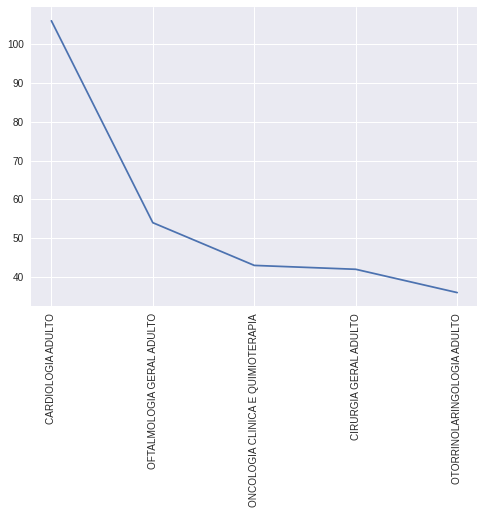

In [12]:
#gerando grafico
plt.plot(maxcategoria['CATEGORIA'], maxcategoria['SOLICITAÇÕES'])
plt.xticks(rotation ='vertical')

In [13]:
#Profissional mais solicitado segundo a planilha
maxcategoria.loc[maxcategoria['SOLICITAÇÕES'].idxmax()]

CATEGORIA       CARDIOLOGIA ADULTO
SOLICITAÇÕES                   106
Name: 88, dtype: object

Qual o tempo de espera ate a data da extração?

In [14]:
#tempo de espera sobre a data da solicitação até a data da extração
df["Tempo de espera"]=df["data_extracao"]-df["data_solicitacao"]
df.head()


,data_extracao,identificador_pessoa2,situacao_solicitacao,data_solicitacao,sexo,nascimento,nome_municipio_residencia,cnes_unidade_solicitante,nome_unidade_solicitante,nome_profissional_solicitante,...,codigo_cid,descricao_especialidade,complexidade,pontos_gravidade,data_consulta,cnes_unidade_executante,nome_unidade_executante,nome_municipio_executante,nome_profissional_executante,Tempo de espera
0,2022-10-01,35ed27d0016cc61f5d91abd619bb47ab,AUTORIZADA,2022-01-04,FEMININO,1962-01,PORTO ALEGRE,2264471,UNIDADE DE SAUDE BELEM NOVO,f980c88a4b3696310d86b4ea20ad1c3b,...,H439,OFTALMOLOGIA DESCOLAMENTO DE RETINA,MEDIA,0,0,0.0,0,0,0,270 days
1,2022-10-01,6a1c913ebf523e361d0303a92ae0adee,AGUARDA_REGULACAO,2022-01-12,MASCULINO,1999-04,PORTO ALEGRE,6676227,UNIDADE DE SAUDE PAULO VIARO,57ae446a14782e245d9b43a028001085,...,L989,DERMATOLOGIA GERAL,MEDIA,0,0,0.0,0,0,0,262 days
2,2022-10-01,31e9df958b43e2bc877a92617f458580,AGUARDA_REGULACAO,2022-01-04,MASCULINO,2017-05,VIAMAO,2231441,UBS SANTA ISABEL VIAMAO,f63240d634c6afcc00dcb2fb372b459f,...,F840,GENETICA MEDICA PEDIATRICA,MEDIA,500,0,0.0,0,0,0,270 days
3,2022-10-01,2daa21e0156d009efb77de92e37afc5e,AGUARDA_REGULACAO,2022-01-07,FEMININO,1986-07,IJUI,2260204,POSTO CENTRAL SECRETARIA MUNICIPAL DA SAUDE IJUI,66771318f89a6d58bd64382354d1aa92,...,R102,GINECOLOGIA LAPAROSCOPIA,ALTA,100,0,0.0,0,0,0,267 days
4,2022-10-01,6fb03243291ac984926683782315fe43,AUTORIZADA,2022-01-11,MASCULINO,1973-10,SANTA ROSA,2254581,FUMSSAR SANTA ROSA,74f7680581e5040a713ce8e80f08240e,...,M511,ORTOPEDIA COLUNA ADULTO,MEDIA,0,0,0.0,0,0,0,263 days


In [15]:
#calculado a idade dos pacientes e salvando em uma nova coluna
df['Ano de nascimento'] = df['nascimento'].str.slice(0,4)
df['Ano de nascimento'] = pd.to_datetime (df ['Ano de nascimento']).dt.year
anoatual=pd.to_datetime (df ['data_solicitacao']).dt.year
df['idade']=anoatual-df['Ano de nascimento'] 
df.head()



,data_extracao,identificador_pessoa2,situacao_solicitacao,data_solicitacao,sexo,nascimento,nome_municipio_residencia,cnes_unidade_solicitante,nome_unidade_solicitante,nome_profissional_solicitante,...,complexidade,pontos_gravidade,data_consulta,cnes_unidade_executante,nome_unidade_executante,nome_municipio_executante,nome_profissional_executante,Tempo de espera,Ano de nascimento,idade
0,2022-10-01,35ed27d0016cc61f5d91abd619bb47ab,AUTORIZADA,2022-01-04,FEMININO,1962-01,PORTO ALEGRE,2264471,UNIDADE DE SAUDE BELEM NOVO,f980c88a4b3696310d86b4ea20ad1c3b,...,MEDIA,0,0,0.0,0,0,0,270 days,1962,60
1,2022-10-01,6a1c913ebf523e361d0303a92ae0adee,AGUARDA_REGULACAO,2022-01-12,MASCULINO,1999-04,PORTO ALEGRE,6676227,UNIDADE DE SAUDE PAULO VIARO,57ae446a14782e245d9b43a028001085,...,MEDIA,0,0,0.0,0,0,0,262 days,1999,23
2,2022-10-01,31e9df958b43e2bc877a92617f458580,AGUARDA_REGULACAO,2022-01-04,MASCULINO,2017-05,VIAMAO,2231441,UBS SANTA ISABEL VIAMAO,f63240d634c6afcc00dcb2fb372b459f,...,MEDIA,500,0,0.0,0,0,0,270 days,2017,5
3,2022-10-01,2daa21e0156d009efb77de92e37afc5e,AGUARDA_REGULACAO,2022-01-07,FEMININO,1986-07,IJUI,2260204,POSTO CENTRAL SECRETARIA MUNICIPAL DA SAUDE IJUI,66771318f89a6d58bd64382354d1aa92,...,ALTA,100,0,0.0,0,0,0,267 days,1986,36
4,2022-10-01,6fb03243291ac984926683782315fe43,AUTORIZADA,2022-01-11,MASCULINO,1973-10,SANTA ROSA,2254581,FUMSSAR SANTA ROSA,74f7680581e5040a713ce8e80f08240e,...,MEDIA,0,0,0.0,0,0,0,263 days,1973,49


Para agendar o atendimento, quem deverá ser priorizado?

In [16]:
#filtrando dados para atendimento priorizados
filtro=(df.loc[(df['data_consulta'] == 0)&(df["pontos_gravidade"]>0)&((df["idade"]> 60) |(df["idade"]<=5))])
filtro


,data_extracao,identificador_pessoa2,situacao_solicitacao,data_solicitacao,sexo,nascimento,nome_municipio_residencia,cnes_unidade_solicitante,nome_unidade_solicitante,nome_profissional_solicitante,...,complexidade,pontos_gravidade,data_consulta,cnes_unidade_executante,nome_unidade_executante,nome_municipio_executante,nome_profissional_executante,Tempo de espera,Ano de nascimento,idade
2,2022-10-01,31e9df958b43e2bc877a92617f458580,AGUARDA_REGULACAO,2022-01-04,MASCULINO,2017-05,VIAMAO,2231441,UBS SANTA ISABEL VIAMAO,f63240d634c6afcc00dcb2fb372b459f,...,MEDIA,500,0,0.0,0,0,0,270 days,2017,5
49,2022-10-01,71a9a2d079e05ef37eeb8cd669c2bc2c,AUTORIZADA,2022-01-12,FEMININO,1948-09,BROCHIER,2224739,POSTO DE SAUDE DE BROCHIER,3c4bf9c44de7af1277fb0a00996c9eb1,...,MEDIA,1750,0,0.0,0,0,0,262 days,1948,74
55,2022-10-01,54bc2a1952d295b252bd4072255a2cf3,CANCELADA,2022-01-06,MASCULINO,1948-06,CACHOEIRINHA,2231360,CENTRO DE ESPECIALIDADES CLINICAS,4c530206aa161e7255834dc8b761d4a3,...,ALTA,250,0,0.0,0,0,0,268 days,1948,74
108,2022-10-01,ed3053e90721afe1a2bff4b389f90dc3,CANCELADA,2022-01-13,MASCULINO,1948-05,IJUI,2260204,POSTO CENTRAL SECRETARIA MUNICIPAL DA SAUDE IJUI,63ad64ca20b0cbc5931940873160209c,...,MEDIA,600,0,0.0,0,0,0,261 days,1948,74
111,2022-10-01,91f19b37ca9727da865d6cf09722e879,AUTORIZADA,2022-01-12,FEMININO,1955-07,NOVO HAMBURGO,9962875,UNIDADE SAUDE DA FAMILIA OPERARIO NH,66a26bc12b29d6400a2bab8d7560e827,...,ALTA,250,0,0.0,0,0,0,262 days,1955,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,2022-10-01,c3f3635b187e9372e89deddbe6a172a8,AUTORIZADA,2022-01-10,MASCULINO,1956-04,PORTO ALEGRE,2237334,SAD CENTRO SANTA MARTA,29d486eff2bcd674e438b1408eaa820d,...,ALTA,1000,0,0.0,0,0,0,264 days,1956,66
1008,2022-10-01,593effcfafec5174bdbbd36e753c6a2d,AUTORIZADA,2022-01-07,MASCULINO,1950-04,SANTA CRUZ DO SUL,6491677,SECRETARIA MUNICIPAL DE SAUDE DE SANTA CRUZ DO...,e5d2d63e8a8bbc7ee36caf31022ec008,...,MEDIA,1000,0,0.0,0,0,0,267 days,1950,72
1009,2022-10-01,cb831f5f3091093ea0e7fdb60cbc5c0a,AUTORIZADA,2022-01-10,MASCULINO,1939-06,VIAMAO,2231956,USF ESMERALDA VIAMAO,ae4c140babae7e1dad56391e550e0505,...,MEDIA,100,0,0.0,0,0,0,264 days,1939,83
1015,2022-10-01,9c036db2b74da5a8d7f9f123ed1cbf80,CANCELADA,2022-01-06,FEMININO,1960-12,TEUTONIA,2251469,CENTRO AVANCADO DE SAUDE BRUNO LEOPOLDO SCHNEIDER,1f3feafe15f53be45a9332ffa416c839,...,ALTA,1750,0,0.0,0,0,0,268 days,1960,62


In [17]:
#criando uma nova planilha para priorizar os exames
agendamentoprioridades=pd.DataFrame(data=filtro)
agendamentoprioridades
agendamentoprioridades.to_excel('prioridade_exame2022.xlsx',index=False)